### Unsupervised learning: Cluster Analysis using K means

### Loading Libraries 

In [34]:
## Importing packages
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import matplotlib.pylab as plt 
import seaborn as sns


### Loading Data

In [35]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving customers.csv to customers (1).csv


In [36]:
# Reading the Dataset
df = pd.read_csv('customers.csv')

In [5]:
# Viewong top rows
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [11]:
 # Describe function
 df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [12]:
# Dropping channel and region
df = df.iloc[: , 4:]

In [13]:
# Df Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Grocery           440 non-null    int64
 1   Frozen            440 non-null    int64
 2   Detergents_Paper  440 non-null    int64
 3   Delicassen        440 non-null    int64
dtypes: int64(4)
memory usage: 13.9 KB


### K means: Clustering analysis

In [14]:
# Standardizing the variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled

,0,1,2,3
0,-0.041115,-0.589367,-0.043569,-0.066339
1,0.170318,-0.270136,0.086407,0.089151
2,-0.028157,-0.137536,0.133232,2.243293
3,-0.392977,0.687144,-0.498588,0.093411
4,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...
435,0.850760,2.075222,-0.566831,0.241091
436,-0.757165,0.296561,-0.585519,0.291501
437,2.348386,-0.543380,2.511218,0.121456
438,-0.602514,-0.419441,-0.569770,0.213046


In [15]:
# df with head function 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()

,0,1,2,3
0,-0.041115,-0.589367,-0.043569,-0.066339
1,0.170318,-0.270136,0.086407,0.089151
2,-0.028157,-0.137536,0.133232,2.243293
3,-0.392977,0.687144,-0.498588,0.093411
4,-0.079356,0.173859,-0.231918,1.299347


In [16]:
# Df with columns function
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head(6)

,0,1,2,3
0,-0.041115,-0.589367,-0.043569,-0.066339
1,0.170318,-0.270136,0.086407,0.089151
2,-0.028157,-0.137536,0.133232,2.243293
3,-0.392977,0.687144,-0.498588,0.093411
4,-0.079356,0.173859,-0.231918,1.299347
5,-0.297637,-0.496155,-0.228138,-0.026224


In [17]:
# Create Clusters with K means computing
kmeans = KMeans(n_clusters = 6, random_state = 2)
k_pred = kmeans.fit(df_scaled)
k_pred


KMeans(n_clusters=6, random_state=2)

In [18]:
# Cluster controls
df_clust = pd.DataFrame(k_pred.cluster_centers_, columns= df.columns)
df_clust



,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.345058,1.371496,-0.462426,0.179321
1,5.496726,-0.050407,5.464750,0.460600
2,1.287217,6.900600,-0.554862,16.478447
3,1.148874,-0.312694,1.205502,0.146617
4,-0.367510,-0.277297,-0.349375,-0.149706
5,-0.011301,9.252557,-0.464047,0.933164


In [20]:
# Precision
df_clust = pd.DataFrame(k_pred.cluster_centers_, columns= df.columns)
pd.set_option('precision', 6)
df_clust

,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.345058,1.371496,-0.462426,0.179321
1,5.496726,-0.050407,5.464750,0.460600
2,1.287217,6.900600,-0.554862,16.478447
3,1.148874,-0.312694,1.205502,0.146617
4,-0.367510,-0.277297,-0.349375,-0.149706
5,-0.011301,9.252557,-0.464047,0.933164


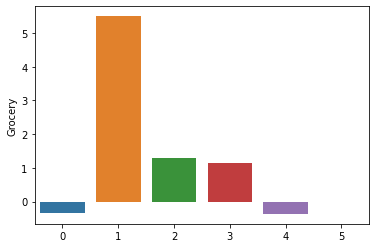

In [22]:
# Grocery
sns.barplot(data = df_clust, x = df_clust.index, y = 'Grocery')

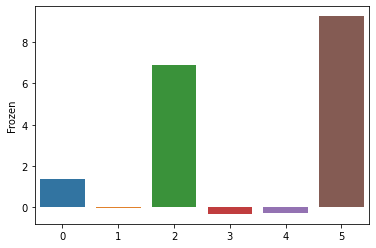

In [23]:
# Frozen 
sns.barplot(data = df_clust, x = df_clust.index, y = 'Frozen')

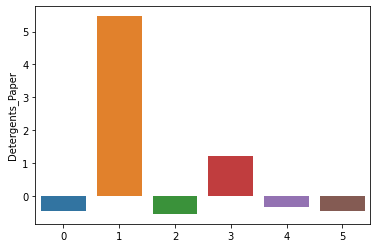

In [24]:
# Detergents paper
sns.barplot(data = df_clust, x = df_clust.index, y = 'Detergents_Paper')

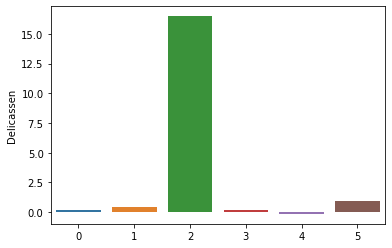

In [25]:
# Delicassen
sns.barplot(data = df_clust, x = df_clust.index, y = 'Delicassen')

### Choosing K Elbow method

In [40]:
# Computing inertia
distortions = []
K = range(2,10)
for i in K:
  km = KMeans(n_clusters = i)
  km.fit(df_scaled)
  distortions.append(km.inertia_)

In [41]:
distortions

[1250.5084622984941,
 930.5483693170211,
 736.00029609077,
 549.6177042410884,
 432.95943736170886,
 352.85076338728004,
 281.1210846497804,
 250.79970230124593]

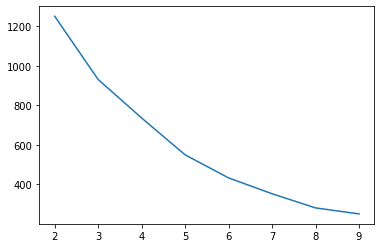

In [44]:
#plot inertia
plt.plot(K, distortions)

In [45]:
print(distortions)

[1250.5084622984941, 930.5483693170211, 736.00029609077, 549.6177042410884, 432.95943736170886, 352.85076338728004, 281.1210846497804, 250.79970230124593]


In [46]:
 # Create Clusters with K means computing
kmeans = KMeans(n_clusters = 5, random_state = 2)
k_pred = kmeans.fit(df_scaled)
k_pred

KMeans(n_clusters=5, random_state=2)

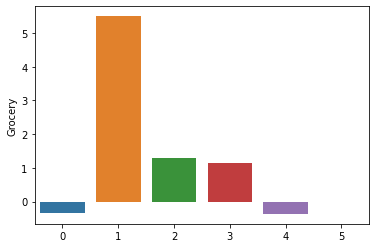

In [47]:
# Grocery
sns.barplot(data = df_clust, x = df_clust.index, y = 'Grocery')

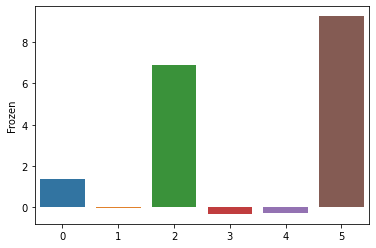

In [48]:
# Frozen 
sns.barplot(data = df_clust, x = df_clust.index, y = 'Frozen')

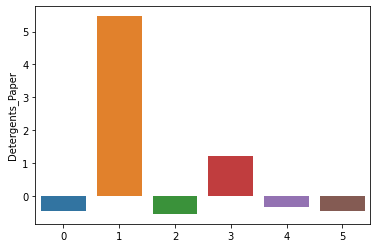

In [49]:
# Detergents paper
sns.barplot(data = df_clust, x = df_clust.index, y = 'Detergents_Paper')